In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
home = pd.read_csv("home_price.csv")

In [6]:
home.head()

,Year,Population,Average_Income,Households,GDP_per_capita,Price,Poperty_tax,Inflation
0,2000,281710909,30657,104705000,36334.9088,109.138,2.922,3.3769
1,2001,284607993,31589,108209000,37133.2428,116.451,2.965,2.8262
2,2002,287279318,31832,109297000,38023.1611,127.621,3.056,1.5860
3,2003,289815562,32681,111278000,39496.4859,140.180,3.095,2.2701
4,2004,292354658,34251,112000000,41712.8011,159.330,3.114,2.6772


In [7]:
home.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            21 non-null     int64  
 1   Population      21 non-null     int64  
 2   Average_Income  21 non-null     int64  
 3   Households      21 non-null     int64  
 4   GDP_per_capita  21 non-null     float64
 5   Price           21 non-null     float64
 6   Poperty_tax     21 non-null     float64
 7   Inflation       21 non-null     float64
dtypes: float64(4), int64(4)
memory usage: 1.4 KB


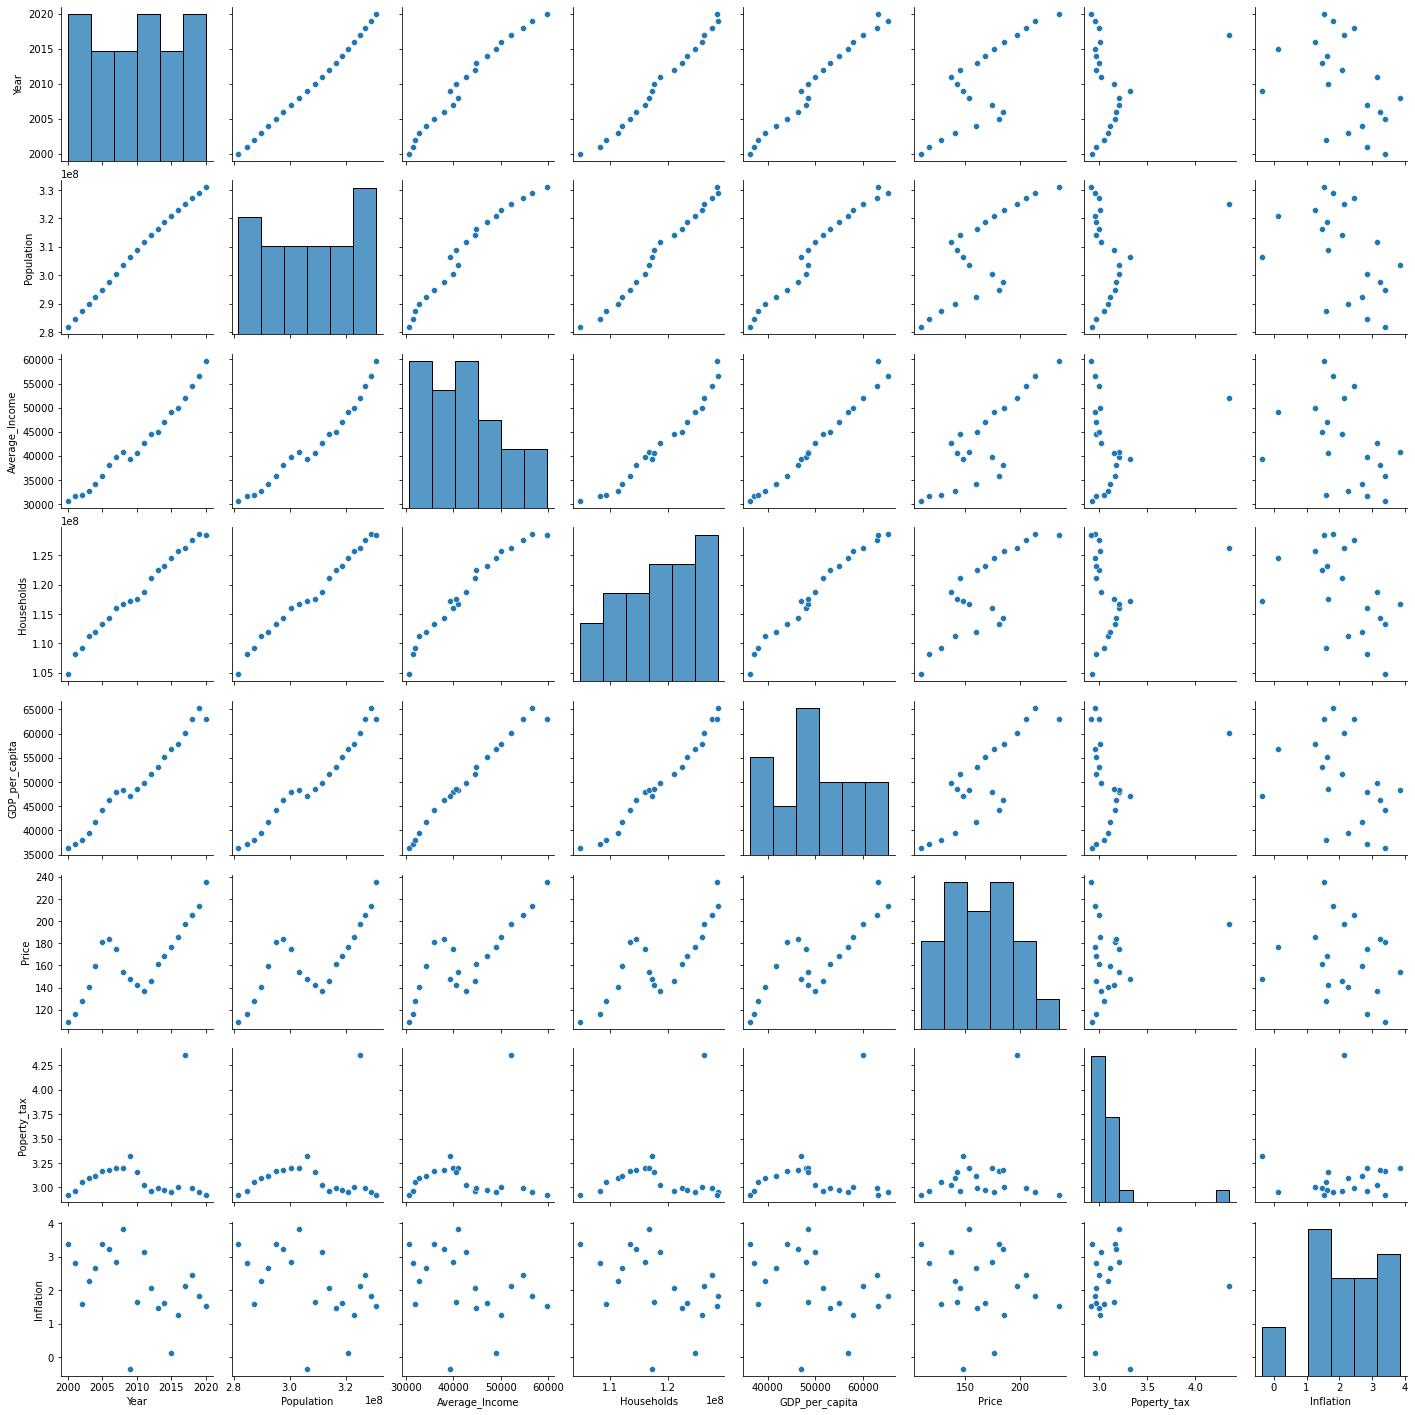

In [8]:
sns.pairplot(home)

<AxesSubplot:>

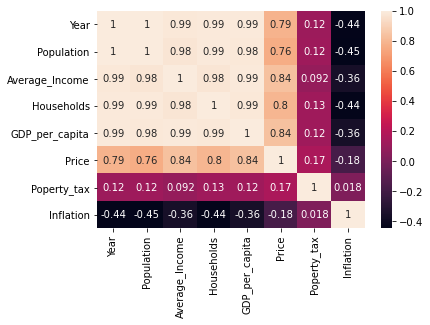

In [9]:
sns.heatmap(home.corr(),annot=True)

In [10]:
x = home.drop(["Year","Households","GDP_per_capita","Price"],axis = 1)

In [11]:
y = home[["Price"]]

In [12]:
from sklearn.linear_model import LinearRegression

In [13]:
from sklearn import metrics

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(x,y)

LinearRegression()

In [16]:
pred = lr.predict(x)

In [17]:
print("Intercept : ",lr.intercept_)

Intercept :  [591.06559923]


In [18]:
lrcoef = lr.coef_.reshape(-1)

In [19]:
coeff_df = pd.DataFrame(lrcoef, x.columns, columns=["Coefficient"])

In [20]:
coeff_df

,Coefficient
Population,-0.000003
Average_Income,0.007684
Poperty_tax,13.789996
Inflation,0.092408


In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y, pred)) 

Mean Absolute Error: 10.97367686291967


In [22]:
print('Mean Squared Error:', metrics.mean_squared_error(y, pred))

Mean Squared Error: 222.09191391626004


In [23]:
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y, pred)))

Root Mean Squared Error: 14.902748535631273


In [24]:
print('R2:', np.sqrt(metrics.r2_score(y, pred)))

R2: 0.8818607809658496


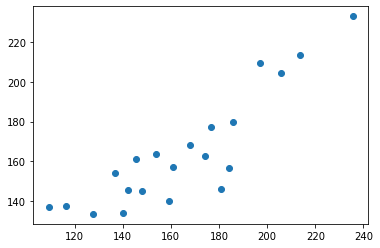

In [25]:
plt.scatter(y,pred)

In [26]:
new = [[333000000, 65000, 3, 1.6]]
print('The new predicted price:', lr.predict(new)[0])

The new predicted price: [269.29534721]
